<a href="https://colab.research.google.com/github/scsin/stock_analysis/blob/master/wtd_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [0]:
!pip install ipython-secrets && install gsheet-keyring

In [0]:
import pandas as pd
import datetime
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from ipython_secrets import *

# Stock definition, start date and end date

In [0]:
index = '^IBOV'
stock = 'MGLU3'
start_date = '2018-11-27'
end_date = datetime.date.today()

# API Get and save response in csv file

In [0]:
my_wtd_token = get_secret('token')

req_index = requests.get(f'https://api.worldtradingdata.com/api/v1/history?symbol={index}&date_from={start_date}&date_to={end_date}&api_token={my_wtd_token}&output=csv')

req_stock = requests.get(f'https://api.worldtradingdata.com/api/v1/history?symbol={stock}.SA&date_from={start_date}&date_to={end_date}&api_token={my_wtd_token}&output=csv')

with open(f"{index}.csv", "wb") as f:
  f.write(req_index.content)
  
with open(f"{stock}.csv",'wb') as f: 
  f.write(req_stock.content)

index_csv_load = pd.read_csv(f'{index}.csv')
stock_csv_load = pd.read_csv(f'{stock}.csv')

# Describe

In [0]:
def get_describe(file_csv):
  return round(file_csv.describe(), 2)

In [0]:
print(index)
get_describe(index_csv_load)

^IBOV


,Open,Close,High,Low,Volume
count,249.00,249.00,249.00,249.00,249.0
mean,98422.35,98510.57,99251.05,97661.59,0.0
std,5740.89,5712.86,5635.17,5763.16,0.0
min,85140.60,85136.10,85684.26,83891.74,0.0
25%,94654.00,94754.70,95641.51,93883.23,0.0
50%,97861.27,97885.60,98435.96,97087.23,0.0
75%,103451.93,103451.93,104155.86,102596.13,0.0
max,109572.16,109580.57,109671.91,108360.22,0.0


In [0]:
print(stock)
get_describe(stock_csv_load)

MGLU3


,Open,Close,High,Low,Volume
count,249.00,249.00,249.00,249.00,249.00
mean,28.57,28.57,29.05,28.06,4505993.57
std,8.19,8.19,8.36,8.00,5818249.45
min,20.04,19.98,20.56,19.78,426200.00
25%,21.86,21.78,22.11,21.40,884300.00
50%,24.25,24.32,24.81,23.91,1269900.00
75%,36.28,36.29,36.90,35.53,7602600.00
max,48.14,47.19,48.79,45.70,32093300.00


# Get intervals (Date, Close)

In [0]:
def get_date_close(file_csv):
  return file_csv.get(['Date', 'Close'])

In [0]:
print(index)
get_date_close(index_csv_load)

^IBOV


,Date,Close
0,2019-11-27,107707.75
1,2019-11-26,107059.40
2,2019-11-25,108423.93
3,2019-11-22,108692.28
4,2019-11-21,107496.73
...,...,...
244,2018-12-03,89820.09
245,2018-11-30,89504.03
246,2018-11-29,89709.56
247,2018-11-28,89250.82


In [0]:
print(stock)
get_date_close(stock_csv_load)

MGLU3


,Date,Close
0,2019-11-27,45.60
1,2019-11-26,43.04
2,2019-11-25,44.30
3,2019-11-22,45.49
4,2019-11-21,45.00
...,...,...
244,2018-12-03,20.27
245,2018-11-30,20.58
246,2018-11-29,21.41
247,2018-11-28,21.26


# Data visualization

In [0]:
def chart(file_csv):
  file_asc = file_csv.sort_values('Date', ascending=True)
  return plt.plot(pd.DataFrame(data=file_asc).columns[0], pd.DataFrame(data=file_asc).columns[1], data=file_asc)

^IBOV


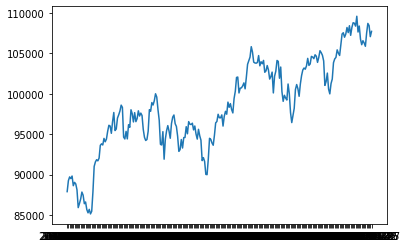

In [199]:
print(index)
chart(get_date_close(index_csv_load))

MGLU3


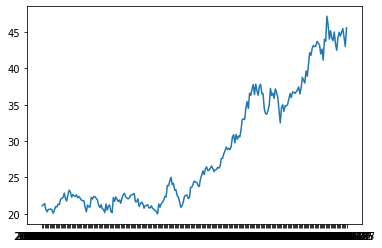

In [200]:
print(stock)
chart(get_date_close(stock_csv_load))

MGLU3


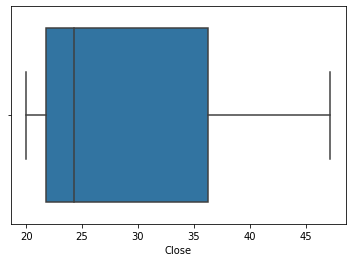

In [196]:
print(stock)
sns.boxplot(stock_csv_load.Close)